In [39]:
import yfinance as yf

"""
Closing Price of stock stockDF on day T
Represents Sj(t)
"""
def closing_price(stockDF, T):
    return stockDF.loc[str(T), 'Close']


"""
Daily Rate of Return.
Represents Yj(t)
"""
def daily_rate_of_return(stockDF, T):
    today = closing_price(stockDF, T)
    yesterday = closing_price(stockDF, T - 1)
    return (today - yesterday) / yesterday


"""
Vj
Creates a list of data corresponding to two weeks of trading days before the day T
"""
def vj(stockDF, T):
    rates_of_return = []
    for i in range(0, 15):
        rates_of_return.append(daily_rate_of_return(stockDF, T - i))
    # Invert the elements in rates_of_return
    rates_of_return = rates_of_return[:: -1]
    return rates_of_return


"""
True Class
returns 0, 1, 2 based on the value of the input
Corresponds to STABLE, UP and DOWN
"""
def true_class(targ):
    # if UP
    if targ >= 0.006:
        return 1
    # if DOWN
    elif targ <= -0.006:
        return 2
    # If STABLE
    else:
        return 0


### TARG is defined as tomorrows Yj(T)
def targ(stockDF, T):
    return daily_rate_of_return(stockDF, T+1)


def make_zt(X):
    return X.map(true_class)

def make_xt(stocks, T):
    """
    Xt Represents an array containing all our line vector stock data "Vj(t)"
    """
    xt_list = []
    ticker_list = []
    for stock, ticker in stocks:
        xt_list.append(vj(stock, T))
        ticker_list.append(ticker)
    return xt_list, ticker_list

def create_xt(stock, T):
    """ 
    Xt Represents an array containing all our line vector stock data "Vj(t)" 
    """
    xt_list = []
    for stock, ticker in stocks:
        xt_list.extend(vj(stock, T))
    return xt_list


def confusion_matrix_percentage(conf_matrix):
    return (conf_matrix / conf_matrix.sum()) * 100

In [2]:
################### Slide 2 #########################
tickers = ["AAPL", "MSFT", "TSLA", "META", "GOOGL", "AMZN", "NVDA", "AMD", "DIS", "NFLX",
           "JPM", "KO", "BAC", "C", "WFC", "GS", "AXP", "MCD", "DJI", "SPY"]

stocks = []

for ticker in tickers:
    stocks.append((yf.Ticker(ticker).history(start='2016-01-01', end='2022-12-31'), ticker))

for stock in stocks:
    new_index = [str(i + 1) for i in range(len(stock[0]))]
    stock[0].index = new_index


In [3]:
################### Slide 4 #########################
Y = []
for stock, ticker in stocks:
    for day in range(2, len(stock) - 1):
        Y.append((ticker, day, daily_rate_of_return(stock, day)))

In [4]:
################### Slide 4 cont #########################

import matplotlib.cm as cm

colors = cm.get_cmap('rainbow', 3)  # using 'rainbow' colormap here, you can choose any
unique_tickers = list(set([x[0] for x in Y]))  # gets unique tickers


# Chunking function
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]


# Dividing tickers into chunks of 5
chunks_of_tickers = list(chunks(unique_tickers, 3))
"""
# Now plotting
for chunk in chunks_of_tickers:
    for i, ticker in enumerate(chunk):
        ticker_data = [x for x in Y if x[0] == ticker]  # filter out data for this ticker only
        days = [x[1] for x in ticker_data]  # x-axis data
        rates_of_return = [x[2] for x in ticker_data]  # y-axis data
        plt.plot(days, rates_of_return, color=colors(i), label=ticker)
    plt.xlabel('Day')
    plt.ylabel('Rate of Return')
    plt.title('Rate of Return Over Days for Each Ticker')
    plt.legend()  # add a legend
    plt.show()
"""



/tmp/ipykernel_6299/2961004328.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('rainbow', 3)  # using 'rainbow' colormap here, you can choose any


"\n# Now plotting\nfor chunk in chunks_of_tickers:\n    for i, ticker in enumerate(chunk):\n        ticker_data = [x for x in Y if x[0] == ticker]  # filter out data for this ticker only\n        days = [x[1] for x in ticker_data]  # x-axis data\n        rates_of_return = [x[2] for x in ticker_data]  # y-axis data\n        plt.plot(days, rates_of_return, color=colors(i), label=ticker)\n    plt.xlabel('Day')\n    plt.ylabel('Rate of Return')\n    plt.title('Rate of Return Over Days for Each Ticker')\n    plt.legend()  # add a legend\n    plt.show()\n"

In [5]:
################### Slide 5 #########################
Xt, tickers = make_xt(stocks, 97)
mod_xt = create_xt(stocks, 97)
# extract vj values and convert to dataframe

import numpy as np
import pandas as pd

X_data = pd.DataFrame(mod_xt).T
"""
# reshape it into 1D and convert into a DataFrame
X_data = pd.DataFrame(Xt, index=tickers).T
"""

print(X_data)
print(X_data.shape)

        0         1         2         3         4         5        6    \
0 -0.001067  0.016446 -0.010401 -0.004059 -0.005577  0.000755  0.00679   

        7         8         9    ...       290       291       292      293  \
0 -0.009741 -0.023457  0.001993  ...  0.000826  0.012434 -0.009355  0.00029   

        294       295       296       297       298       299  
0 -0.008714  0.009866 -0.009334  0.000293 -0.003465  0.006317  

[1 rows x 300 columns]
(1, 300)


In [6]:
################### Slide 6 #########################
Z_data = make_zt(X_data)
print(Z_data)


   0    1    2    3    4    5    6    7    8    9    ...  290  291  292  293  \
0    0    1    2    0    0    0    1    2    2    0  ...    0    1    2    0   

   294  295  296  297  298  299  
0    2    1    2    0    0    1  

[1 rows x 300 columns]


In [24]:
################### Slide 7 #########################
# Slide 7 simply describes the goal of the next few slides


In [7]:
################### Slide 8 #########################

CL0 = Z_data.apply(lambda x: (x == 0))
CL1 = Z_data.apply(lambda x: (x == 1))
CL2 = Z_data.apply(lambda x: (x == 2))

s0 = CL0.sum().sum()
s1 = CL1.sum().sum()
s2 = CL2.sum().sum()

N = s0 + s1 + s2

print(N)
print(s0)
print(s1)
print(s2)

R0 = s0/N
R1 = s1/N
R2 = s2/N
print(f"Initial Stable Ratio: {R0}\nInitial Up Ratio: {R1}\nInitial Down Ratio: {R2}")

"""
Due to the data set already containing a fairly balanced set of classes, there is no need to clone the data in X_data
"""


300
112
90
98
Initial Stable Ratio: 0.37333333333333335
Initial Up Ratio: 0.3
Initial Down Ratio: 0.32666666666666666


'\nDue to the data set already containing a fairly balanced set of classes, there is no need to clone the data in X_data\n'

In [65]:
################### Slide 9 part 1 #########################
# Take all but the last day of trading in X_train
X_data_mod = X_data.iloc[:, :-1]
# Select stock 20 as our target for Random Forest Classifier
Z_data_mod = Z_data.iloc[:, 1:]
M = X_data.shape[1]
print(M)

# X_train and Y_train are now dataframes whose elements are offset by one day, producing a training set of a stock's daily value and tomorrow's price action

299


In [66]:
############# Feedback correction ##########
"""
    As per feedback, the data set has been split into training and test data, with training data being 85% of the original size and test data being 15% of the original size
"""
from sklearn.model_selection import train_test_split

# Assuming that X_data is your pandas DataFrame

X_train, X_test, Y_train, Y_test = train_test_split(X_data_mod.T, Z_data_mod.T, test_size=0.15)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(253, 1)
(45, 1)
(253, 1)
(45, 1)


In [67]:
################### Slide 9 part 2 #########################
# 2M/3 proves that M must be a number less than 100, as max_samples must be a number smaller than n_estimators
# I.E., M cannot be a number in the range 300, for a random forest with 100 trees

from sklearn.ensemble import RandomForestClassifier
import time

# Create our random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, max_features=18, oob_score=True)
start_time = time.time()
clf.fit(X_train, np.ravel(Y_train))
end_time = time.time()

oob_score = clf.oob_score_
elapsed_time = end_time - start_time

print(f"Training took {elapsed_time} seconds.")

print(f"OOB : {round(oob_score*100,1)}%")
z=clf.predict(X_train)

Training took 0.14035534858703613 seconds.
OOB : 37.5%


In [68]:
################### Slide 10 part 1 #########################
# Create a reuseable Train Random Forest function to be used for the remaining slides

import time

def TrainRandomForest(num_tree, num_select_features, X_train, Y_train):
    from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    # Create our random forest classifier
    clf = RandomForestClassifier(n_estimators=num_tree, random_state=42, oob_score=True,
                                 bootstrap=True, max_samples=0.87,
                                 max_features=num_select_features)
    # Calculate computation start time
    start_time = time.time()
    # Train the model
    clf.fit(X_train, np.ravel(Y_train))
    # Calculate computation end time
    end_time = time.time()
    # Total time is end - start
    elapsed_time = end_time - start_time
    # Get out of bag score
    oob_score = clf.oob_score_
    return clf, oob_score, elapsed_time, clf.feature_importances_


In [69]:
################### Slide 10 part 2 #########################
# Compute one iteration of the Random Forest

clf, oob_score, elapsed_time, features = TrainRandomForest(100, 18, X_train, Y_train)
print(f"Training time was {elapsed_time} seconds")

print(f"OOB : {round(oob_score*100,1)}%")


Training time was 0.13576769828796387 seconds
OOB : 37.5%


In [197]:
################### Slide 10 part 3 #########################
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix


"""Get trainCONF"""
# Get the predicted values
Y_train_pred = clf.predict(X_train)
#Create the training confusion matrix
trainCONF = confusion_matrix(np.ravel(Y_train), Y_train_pred)
trainCONF = confusion_matrix_percentage(trainCONF)

"""Get trainCONF"""
# Get the predicted test values
Y_test_pred = clf.predict(X_test)
#Create the test confusion matrix
testCONF = confusion_matrix(np.ravel(Y_test), Y_test_pred)
testCONF = confusion_matrix_percentage(testCONF)

# Format print to print the matrix elements as percentages
np.set_printoptions(formatter={'float': lambda x: "{:0.2f}%".format(x)})

print('Train Confusion Matrix (%):\n', trainCONF)
print('Test Confusion Matrix (%):\n', testCONF)

# Undo formatting of numbers as percent
np.set_printoptions(formatter={'float': None})

Train Confusion Matrix (%):
 [[38.74% 0.00% 0.40%]
 [0.00% 29.25% 0.00%]
 [0.00% 0.00% 31.62%]]
Test Confusion Matrix (%):
 [[8.89% 6.67% 11.11%]
 [11.11% 8.89% 13.33%]
 [17.78% 8.89% 13.33%]]


In [81]:
################### Slide 11 #########################
trees = [100,200,300,400,500]
selected_features = [18,36,72,140,200]
OOB_accuracies = []
computation_times = []
data = []
for tree in trees:
    for SF in selected_features:
        clf, oob_score, elapsed_time, features = TrainRandomForest(tree, SF, X_train, Y_train)
        data.append((tree, SF, f"{round(oob_score*100,2)}%", elapsed_time))

# print(data)
df = pd.DataFrame(data, columns=['Tree', 'SF', 'oob_score', 'computation_time'])
df_pivot_oob = df.pivot(index='Tree', columns='SF', values='oob_score')
df_pivot_time = df.pivot(index='Tree', columns='SF', values='computation_time')

print(f"Out of Box scores\n {df_pivot_oob}")
print(f"Computation times (s)\n {df_pivot_time}")
# Best TR* = 100; Best SF* = 36

Out of Box scores
 SF       18      36      72      140     200
Tree                                        
100   37.55%  37.55%  37.55%  37.55%  37.55%
200   36.76%  36.76%  36.76%  36.76%  36.76%
300   36.76%  36.76%  36.76%  36.76%  36.76%
400   37.15%  37.15%  37.15%  37.15%  37.15%
500   37.15%  37.15%  37.15%  37.15%  37.15%
Computation times (s)
 SF         18        36        72        140       200
Tree                                                  
100   0.119599  0.095453  0.102666  0.150097  0.124453
200   0.191713  0.194607  0.191193  0.192690  0.191122
300   0.282931  0.283561  0.283229  0.285970  0.282841
400   0.381158  0.382740  0.490882  0.390307  0.377627
500   0.471941  0.471732  0.473788  0.472434  0.472232


In [89]:
################### Slide 12-14 #########################
from sklearn.inspection import permutation_importance
RF_prime = RandomForestClassifier(n_estimators=100, max_features=18, criterion='gini', n_jobs=-1, oob_score=True)
RF_prime.fit(X_train, np.ravel(Y_train))

oob_prime = RF_prime.oob_score_
features = RF_prime.n_features_in_
importances = RF_prime.feature_importances_

# Print the feature ranking
print(f"OOB : {round(oob_prime*100,1)}%")



OOB : 37.9%


In [218]:
################### Slide 15 part 1 #########################
"""
For RF*, compute the importances of all features
"""
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import numpy as np


# Your original model accuracy
orig_accuracy = accuracy_score(Z_data.T, RF_prime.predict(X_data.T))

# Store the feature importances
importances = []

# For each feature
for i in range(X_data.shape[1]):
    # Create a copy of the test data
    X_data_copy = X_data.T.copy()

    for i in range(X_data_copy.shape[1]):  # assuming 'i' refers to columns
        # Shuffle the values of the ith feature
        X_data_copy.iloc[:, i] = shuffle(X_data_copy.iloc[:, i])

    # Get the accuracy score after making this change
    shuff_accuracy = accuracy_score(Z_data.T, RF_prime.predict(X_data_copy))

    # The importance of the feature is the decrease in accuracy
    importances.append(orig_accuracy - shuff_accuracy)

# Normalize the importances to get percentages
importances = np.array(importances)


np.set_printoptions(precision=3)
# Print the importances
print("Feature importances (Mean Decrease Accuracy):\n", importances)

Feature importances (Mean Decrease Accuracy):
 [-0.033 -0.084 -0.023 -0.064 -0.033 -0.05  -0.007 -0.06  -0.03  -0.077
 -0.04  -0.09  -0.06  -0.017 -0.027 -0.064 -0.057 -0.06  -0.023  0.003
 -0.02  -0.06  -0.033 -0.06  -0.047 -0.047 -0.074 -0.084 -0.023 -0.013
 -0.033 -0.064 -0.027  0.01  -0.043 -0.05  -0.017 -0.05  -0.037 -0.04
 -0.07  -0.013 -0.094 -0.074 -0.064  0.003 -0.03  -0.05  -0.007 -0.04
 -0.074 -0.084 -0.04   0.    -0.064 -0.084 -0.06  -0.027 -0.05  -0.027
 -0.07  -0.023 -0.043 -0.057 -0.047 -0.067 -0.043 -0.03  -0.147  0.007
 -0.033 -0.08  -0.023 -0.08   0.003 -0.05  -0.054 -0.067 -0.033 -0.013
 -0.017 -0.064 -0.07  -0.027 -0.043 -0.027 -0.047 -0.033 -0.03  -0.013
 -0.017 -0.08  -0.04  -0.03  -0.054 -0.07  -0.06  -0.064 -0.03  -0.033
 -0.047 -0.064 -0.007 -0.033 -0.043 -0.07  -0.07  -0.033 -0.067 -0.01
 -0.033 -0.074 -0.064 -0.07  -0.057 -0.04  -0.01  -0.054 -0.074 -0.087
  0.007  0.033 -0.054 -0.017 -0.06  -0.054 -0.067 -0.023 -0.013 -0.03
 -0.057 -0.047 -0.057 -0.03  -0.01

In [219]:
"""
Rank the features by decreasing importance
"""
ranked_features = sorted(zip(X_data.columns, importances), key=lambda x: x[1], reverse=True)

# Print ordered feature importances
for feature, importance in ranked_features:
    print(f"The feature {feature} has a drop-in accuracy of: {round(importance,3)}")

The feature 121 has a drop-in accuracy of: 0.033
The feature 263 has a drop-in accuracy of: 0.017
The feature 33 has a drop-in accuracy of: 0.01
The feature 266 has a drop-in accuracy of: 0.01
The feature 69 has a drop-in accuracy of: 0.007
The feature 120 has a drop-in accuracy of: 0.007
The feature 163 has a drop-in accuracy of: 0.007
The feature 169 has a drop-in accuracy of: 0.007
The feature 199 has a drop-in accuracy of: 0.007
The feature 19 has a drop-in accuracy of: 0.003
The feature 45 has a drop-in accuracy of: 0.003
The feature 74 has a drop-in accuracy of: 0.003
The feature 192 has a drop-in accuracy of: 0.003
The feature 290 has a drop-in accuracy of: 0.003
The feature 53 has a drop-in accuracy of: 0.0
The feature 187 has a drop-in accuracy of: 0.0
The feature 211 has a drop-in accuracy of: 0.0
The feature 214 has a drop-in accuracy of: 0.0
The feature 241 has a drop-in accuracy of: 0.0
The feature 146 has a drop-in accuracy of: -0.003
The feature 253 has a drop-in accurac

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

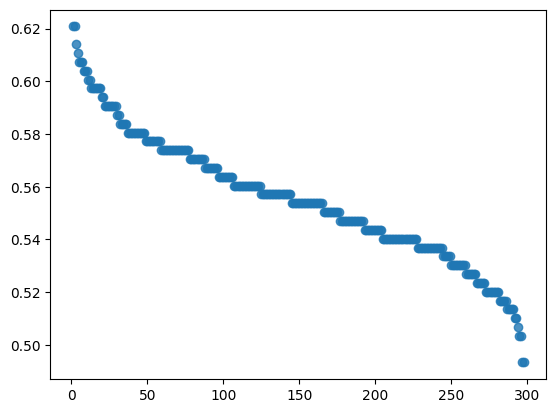

In [211]:
"""
Graph the importances of each feature as a descending curve
"""
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Unpack feature names and importances into separate lists
features, importances = zip(*ranked_features)

# Represent index as a feature rank
ranks = np.arange(len(features)) + 1

# Create Dataframe for seaborn
data = pd.DataFrame({'Importance': importances, 'Rank': ranks})

# Seaborn regplot with lowess=True for a smoother regression line
sns.regplot(x='Rank', y='Importance', data=data, lowess=True)

# Set labels for the plot
plt.title('Feature Importance Ranked by Random Forest')
plt.xlabel('Rank')
plt.ylabel('Importance (Drop in Accuracy)')

plt.show()

In [220]:
"""
Get the ten most important features (k1 ... k10)
"""
top_10_features = ranked_features[:10]

for feature, importance in top_10_features:
    print(f"The feature {feature} has a drop-in accuracy of: {round(importance,3)}")

The feature 121 has a drop-in accuracy of: 0.033
The feature 263 has a drop-in accuracy of: 0.017
The feature 33 has a drop-in accuracy of: 0.01
The feature 266 has a drop-in accuracy of: 0.01
The feature 69 has a drop-in accuracy of: 0.007
The feature 120 has a drop-in accuracy of: 0.007
The feature 163 has a drop-in accuracy of: 0.007
The feature 169 has a drop-in accuracy of: 0.007
The feature 199 has a drop-in accuracy of: 0.007
The feature 19 has a drop-in accuracy of: 0.003


In [221]:
"""
Translate our list of features into the form Yj(t-r)
 where j is a given stock, and r is the time offset
"""
def map_number_to_day(number: int):
    return number%15
    
def map_number_to_ticker(number: int, tickers: list):
    if number < 0:
        raise ValueError("Number must be non-negative")

    index = number // 15
    if index >= len(tickers):
        raise ValueError("Number is too large for available tickers")

    return tickers[index], map_number_to_day(number)


print("The ten most important pairs of stock 'j' and time delay 'r' are:")
for feature, importance in top_10_features:
    print(map_number_to_ticker(feature, tickers))


The ten most important pairs of stock 'j' and time delay 'r' are:
('DIS', 1)
('MCD', 8)
('TSLA', 3)
('MCD', 11)
('GOOGL', 9)
('DIS', 0)
('JPM', 13)
('KO', 4)
('C', 4)
('MSFT', 4)


In [222]:
"""
Repeat for the 10 least important features
"""
bottom_10_features = ranked_features[-10:]

for feature, importance in bottom_10_features:
    print(f"The feature {feature} has a drop-in accuracy of: {round(importance,3)}")

The feature 258 has a drop-in accuracy of: -0.09
The feature 42 has a drop-in accuracy of: -0.094
The feature 144 has a drop-in accuracy of: -0.094
The feature 229 has a drop-in accuracy of: -0.097
The feature 289 has a drop-in accuracy of: -0.097
The feature 273 has a drop-in accuracy of: -0.1
The feature 204 has a drop-in accuracy of: -0.104
The feature 164 has a drop-in accuracy of: -0.107
The feature 240 has a drop-in accuracy of: -0.107
The feature 68 has a drop-in accuracy of: -0.147


In [223]:
"""
print our 10 least important features in the form (J,r)
"""
print("The ten least important pairs of stock 'j' and time delay 'r' are:")
for feature, importance in bottom_10_features:
    print(map_number_to_ticker(feature, tickers))

The ten least important pairs of stock 'j' and time delay 'r' are:
('MCD', 3)
('TSLA', 12)
('NFLX', 9)
('GS', 4)
('SPY', 4)
('DJI', 3)
('C', 9)
('JPM', 14)
('AXP', 0)
('GOOGL', 8)


In [224]:
################### Slide 16 part 1 ########################
"""
Keep the 40 most important features and get their Zt value
"""

# Get the 40 most important features
features, importances = zip(*ranked_features[:40])
# Convert into a list so we can use its elements to get the data which corresponds to each feature from X_data
features = list(features)
# Get the 40 most important features and their daily returns from X_data
X40 = X_data.iloc[:,features].T

# Get the corresponding values Zt
Z40 = make_zt(X40)

# Split the data into Training and Test data
X40_train, X40_test, Y40_train, Y40_test = train_test_split(X40, Z40, test_size=0.15)

# Train a new random forest with our RF* trees, and 20 random features per node
RF40 = RandomForestClassifier(n_estimators=100, max_features=20, criterion='gini', n_jobs=-1, oob_score=True)
RF40.fit(X40_train, np.ravel(Y40_train))

# Print out of box score
print(f"{round(RF40.oob_score_*100,2)}%")

91.18%


In [230]:
"""
Create a new Training Confusion Matrix and Test Confusion Matrix 
from our Random Forest trained on the 40 most important features
"""
# Format print to print the matrix elements as percentages
np.set_printoptions(formatter={'float': lambda x: "{:0.2f}%".format(x)})

# Get training matrix
Y40_train_pred = RF40.predict(X40_train)
newTrainCONF = confusion_matrix(np.ravel(Y40_train), Y40_train_pred)
print(confusion_matrix_percentage(newTrainCONF))

# Get test matrix
Y40_test_pred = RF40.predict(X40_test)
newTestCONF = confusion_matrix(np.ravel(Y40_test), Y40_test_pred)
print(confusion_matrix_percentage(newTestCONF))


[[35.29% 0.00% 0.00%]
 [0.00% 32.35% 0.00%]
 [0.00% 0.00% 32.35%]]
[[16.67% 0.00% 0.00%]
 [0.00% 50.00% 0.00%]
 [0.00% 0.00% 33.33%]]
